In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "C:/Users/ASUS/de4/project01/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv"
subway_data = pd.read_csv(file_path, encoding='cp949')
subway_data.head(5)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202409,1호선,동대문,471,19,10349,1754,8643,6493,15403,...,9191,797,2548,17,235,0,0,0,0,20241003
1,202409,1호선,동묘앞,186,4,2586,1075,3513,5007,8267,...,4498,98,1697,0,240,0,0,0,0,20241003
2,202409,1호선,서울역,511,16,7470,8314,12959,50508,39164,...,12945,4257,3994,133,302,0,0,0,0,20241003
3,202409,1호선,시청,65,3,1800,4431,3673,23517,7262,...,3687,497,970,3,42,0,0,0,0,20241003
4,202409,1호선,신설동,297,23,8641,2224,9190,9017,20762,...,9071,367,2603,3,56,0,0,0,0,20241003


In [4]:
# 사용자로부터 입력 받기
input_line = '1호선'
input_station = '동대문'

In [5]:
input_data = subway_data[(subway_data['사용월']==202409)&(subway_data['호선명'] == input_line) & (subway_data['지하철역'] == input_station)]
input_data

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202409,1호선,동대문,471,19,10349,1754,8643,6493,15403,...,9191,797,2548,17,235,0,0,0,0,20241003


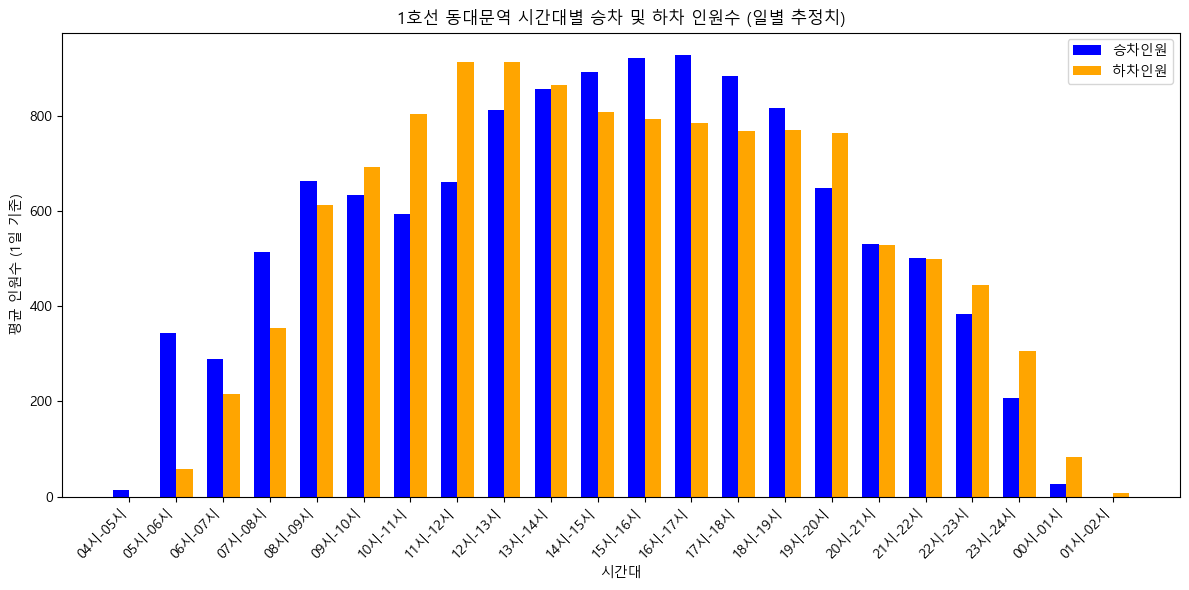

In [8]:
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
# 한글 적용
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
if input_line and input_station:
        # 사용자가 선택한 호선과 지하철역에 해당하는 데이터 필터링
    filtered_data = subway_data[(subway_data['호선명'] == input_line) & (subway_data['지하철역'] == input_station)]
    
    if filtered_data.empty: # 사용자가 선택한 호선에 입력한 지하철역이 없을 때
        print("선택한 호선에 없는 역입니다.")
    else:
        # Matplotlib으로 그래프 생성
        #시간대 (x축)
        time_slots = [
            '04시-05시', '05시-06시', '06시-07시', '07시-08시', '08시-09시', '09시-10시', '10시-11시', 
            '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시', '16시-17시', '17시-18시', 
            '18시-19시', '19시-20시', '20시-21시', '21시-22시', '22시-23시', '23시-24시', '00시-01시', 
            '01시-02시'
        ]
        boarding_cols = [f'{time} 승차인원' for time in time_slots]
        alighting_cols = [f'{time} 하차인원' for time in time_slots]
        
        boarding_data = input_data[boarding_cols].iloc[0].values // 30
        alighting_data = input_data[alighting_cols].iloc[0].values // 30


        x = np.arange(len(time_slots))
        width = 0.35  # 막대 그래프의 너비

# 그래프 그리기
        fig, ax = plt.subplots(figsize=(12, 6))
        
        ax.bar(x - width/2, boarding_data, width, label='승차인원', color='blue')
        ax.bar(x + width/2, alighting_data, width, label='하차인원', color='orange')

        # 그래프 설정
        ax.set_xlabel('시간대')
        ax.set_ylabel('평균 인원수 (1일 기준)')
        ax.set_title(f'{input_line} {input_station}역 시간대별 승차 및 하차 인원수 (일별 추정치)')
        ax.set_xticks(x)
        ax.set_xticklabels(time_slots, rotation=45, ha='right')
        ax.legend()

        # 그래프 보여주기
        plt.tight_layout()
        plt.show()


        # 그래프를 BytesIO 객체에 저장 후 base64로 인코딩
        # 그래프를 html에 띄우기 위함.
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        image_png = buffer.getvalue()
        buffer.close()
        graph_url = base64.b64encode(image_png).decode('utf-8')

        # Matplotlib 세션을 정리
        plt.close()
